# Generate absorption profiles only wrt airmass at LSST
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 January 2020
- update :  26 January 2020
- update : April 21 2020 : to produce abssorption pattern of O3, O2, PWV
- Last verification : December 13th 2021


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
import time
from datetime import datetime,date
import dateutil.parser

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
import libsimulateVisible

libradtranpath= /Users/sylvie/MacOSX/External/libRadtran2/


In [9]:
os.getenv('LIBRADTRANDIR')

'/Users/sylvie/MacOSX/External/libRadtran2'

## Choose the parameters of the simulation

In [10]:
am=np.linspace(1,2.5,16)
pressure = 0. # use default value
pwv=4       # turn on or of the pwv
aer=0  
ozone=0.    # turn on or of the ozone
cloudext=0

In [11]:
NBOBS=len(am)

In [12]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

## Simulation

In [13]:
all_trans = []
for index in np.arange(NBOBS):

    path,thefile=libsimulateVisible.ProcessSimulation(am[index],pwv,ozone,pressure,
                                                      prof_str='us',proc_str='ab',cloudext=cloudext)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)

******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from  0.500000 to 0.500055
******* WARNING >>>>>> 
 SETDIS--beam angle=computational angle;
 ******* changing cosine of solar zenith angle, umu0, from 

## Plot

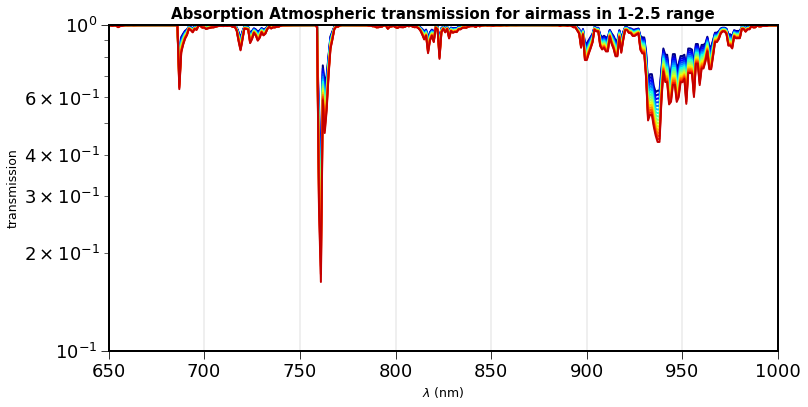

In [14]:
for index in np.arange(NBOBS):   
    plt.semilogy(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(650,1000)
plt.grid()
plt.title("Absorption Atmospheric transmission for airmass in 1-2.5 range")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.1,1)
figname=string_date+"_multiabtransmissionvsairmass.png"
plt.savefig(figname)

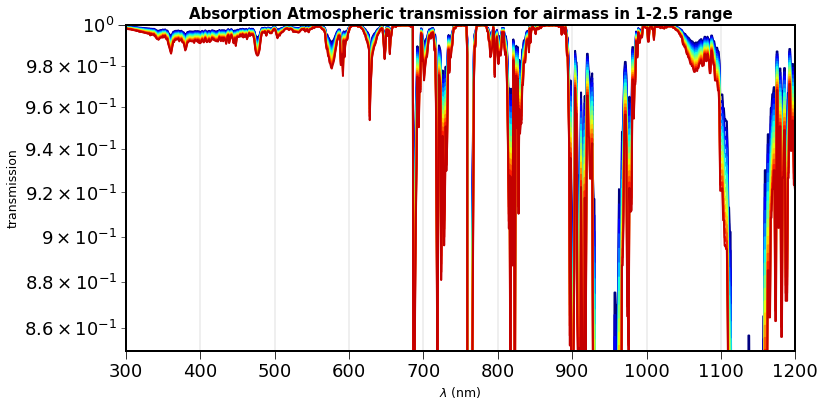

In [15]:
for index in np.arange(NBOBS):   
    plt.semilogy(wl,all_trans[index],'-',color=all_colors[index])
plt.xlim(300,1200)
plt.grid()
plt.title("Absorption Atmospheric transmission for airmass in 1-2.5 range")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.85,1)
#plt.xlim(300,700)
figname=string_date+"_multiabtransmissionvsairmass.png"
plt.savefig(figname)